## Material Created In Response to ICML Reviews

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex
import seaborn as sns

In [3]:

#kaplan version
# C0 = 1e8
# alpha = -0.05
# chin_func = lambda c: 1.69+(c/C0)**(alpha)
# default parameters used throughout our theoretical analysis

# flop_year_zero = 1e19

dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

#chinchilla version 
chin_func = lambda c: 1070*c**(-0.05)+1.7
total_loss = lambda base_flop, time: chin_func(
    (alg_gains**time)*base_flop*(hardware_gains**time)
)
def chin_func(c, alpha=-0.05, C0=1070):
    return C0*c**(alpha)+1.7

#make lambda function into regular function
def loss_full_function(time, init_compute=start_capital, alg_gains=alg_gains_train, hardware_gains=hardware_gains, investment_growth=1, alpha=-0.155, C0=1070):
    return chin_func(
        (alg_gains**time)*init_compute*(investment_growth**time)* (hardware_gains**time)
        , alpha=alpha, C0=C0
    )

def total_loss_inf(init_compute, time):
    effective_training_compute = init_compute * (hardware_gains**time)
    effective_inference_compute = effective_training_compute**2 * (alg_gains_inf**time)*(alg_gains**time)
    return chin_func(effective_inference_compute)


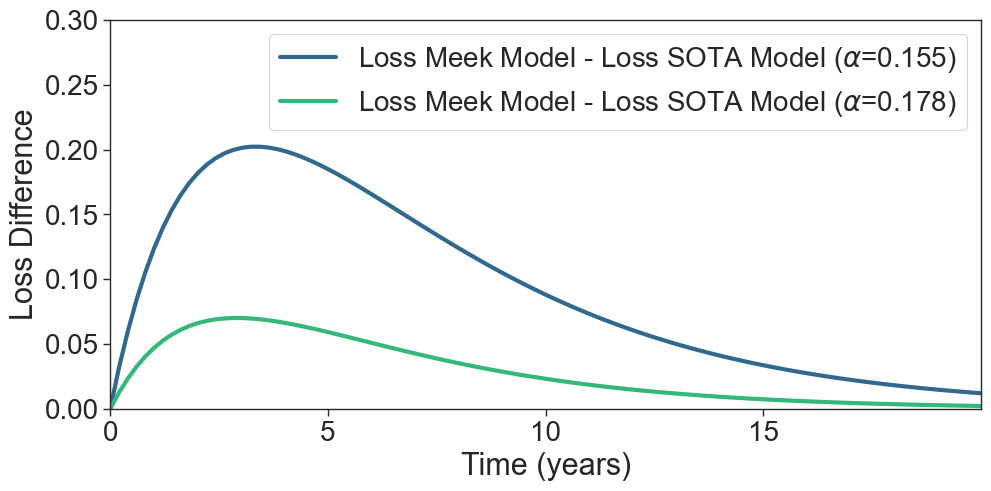

In [11]:
# Plot of overhang over time

dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop


sns.set_style("ticks")
sns.set_context("paper")

time = np.linspace(0, 20, 100)
f = plt.figure(figsize=(10, 5))

# gs = f.add_gridspec(5, 5)
top_model_loss = total_loss(flop_year_zero * (sota_compute_growth) ** time, time)
basic_model_loss = total_loss(flop_year_zero, time)
# Calculate loss difference and find maximum point
loss_diff = basic_model_loss - top_model_loss
# max_idx = np.argmax(loss_diff)
# max_time = time[max_idx]
# max_loss_diff = loss_diff[max_idx]
# plt.rcParams['font.family'] = 'DejaVu Sans'
# sns.lineplot(x=time, y=loss_diff, label="Loss Meek Model - Loss SOTA Model", linewidth=3,color=colors[0])



# plot with different alpha 
alpha_list = [-0.155, -0.178]
colors = sns.color_palette("viridis", n_colors=len(alpha_list))
for i, alpha in enumerate(alpha_list):
    top_model_loss = loss_full_function(init_compute=flop_year_zero * (sota_compute_growth) ** time, time=time, alpha=alpha)
    basic_model_loss = loss_full_function(init_compute=flop_year_zero, time=time, alpha=alpha)
    loss_diff = basic_model_loss - top_model_loss
    sns.lineplot(x=time, y=loss_diff, label=f"Loss Meek Model - Loss SOTA Model ($\\alpha$={-alpha})", linewidth=3, color=colors[i])



plt.ylim(0, 0.3)



# Add vertical line at maximum point
# plt.axvline(x=max_time, color=colors[1], linestyle=':', alpha=0.9, linewidth=4)
# plt.plot(max_time, max_loss_diff, 'o', color=colors[1], markersize=8)  # Add orange dot at peak
# plt.annotate('peak overhang', xy=(max_time, max_loss_diff), xytext=(max_time-1, max_loss_diff-0.55), 
#             fontsize=20)
# add description 
# print(f"Peak overhang occurs at {max_time:.1f} years")
# plt.title("AI Model Training Inequality Over Time",fontweight='bold', fontsize=15)
plt.xlabel("Time (years)", fontsize=22)
# plt.legend(fontsize=14, loc='lower right')
plt.ylabel("Loss Difference", fontsize=22)
#adjust font sizes
plt.xticks(np.arange(0, 20, 5),fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc='upper right')
#adjust label sizes
plt.margins(0,0)
plt.tight_layout()

plt.savefig("Figures/alpha_variation.png")

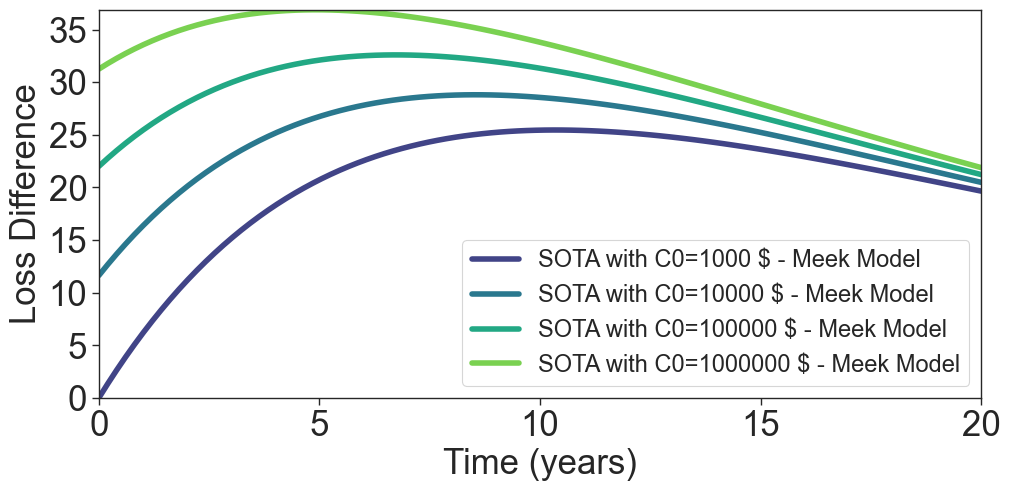

In [5]:
#part of robustness analysis look at different starting captial scenarios
dollar_to_flop = 1e17
alg_gains_train = 2.8 # improvement in algorithmic compute efficency each year
alg_gains = alg_gains_train
hardware_gains = 1.4 #increase in GPU Flops/dollar each year
sota_compute_growth = 5/hardware_gains # model compute budget grows five fold each year
inference_cost = .000143 # cost per inference in dollars
alg_gains_inf = 2.8 # improvement in algorithmic compute efficency each year for inference
# cost_per_flop_year = 0.8
start_capital = 1000
flop_year_zero = start_capital*dollar_to_flop

sns.set_style("ticks")
sns.set_context("paper")
# Plot of overhang over time
time = np.linspace(0, 20, 100)
colors = sns.color_palette("viridis", n_colors=4)
# i want them all to be on the same graph
plt.figure(figsize=(10, 5))
for i, start_capital in enumerate([1000, 10000, 100000, 1000000]):
    # sota_compute_growth = 5 # model compute is growing at 5 times a year 
    # player2_growth = 1.1
    sota_loss = total_loss(start_capital*dollar_to_flop * (sota_compute_growth) ** time, time)
    basic_model_loss = total_loss(1000*dollar_to_flop, time)
    plt.plot(
        time,  basic_model_loss-sota_loss, label=f"SOTA with C0={start_capital} $ - Meek Model", linewidth=4, color=colors[i])
# add description 
#adjust font sizes
plt.xticks(np.arange(0, 21, 5),fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={'size': 14})
# add description to plot
# plt.title("Variation of Initial Top Model Investment", fontsize=14)
plt.xlabel("Time (years)",fontsize=25)
plt.legend(fontsize=17)
plt.ylabel("Loss Difference",fontsize=25)
# plt.grid(True)
#save image to paper images
# extended_colors
plt.tight_layout()
plt.margins(0,0)
plt.savefig("Figures/variation_initial_investment.png")
plt.show()
